In [228]:
import pandas as pd
import geopandas as gpd

In [2]:
orders=gpd.read_file("7565ДС_СПб_Камышовая17/orders_7565ДС_СПб_Камышовая17.gpkg")

Cannot find header.dxf (GDAL_DATA is not defined)


In [9]:
zone=gpd.read_file("7565ДС_СПб_Камышовая17/zone_7565.gpkg")

In [13]:
zone['geometry'][0]

In [229]:
import osmnx as ox

In [230]:
import osmnx as ox
import networkx as nx
from pyproj import Proj, transform

In [231]:
ds=gpd.read_file('7565ДС_СПб_Камышовая17/DS_4326.gpkg')

In [307]:
orders=gpd.read_file('7565ДС_СПб_Камышовая17/orders_part_4326_5000.gpkg')

In [309]:
orders.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [255]:
origin_point.coords[0]

(30.244757, 60.006952000000005)

In [248]:
zone=gpd.read_file('7565ДС_СПб_Камышовая17/zone_7565_4326.gpkg')

In [256]:
ds['geometry'][0].coords[0][0]

30.244757

In [310]:
dest_points=orders['geometry']

In [244]:
dest_points[0].coords[0][0]

30.295476000000004

In [263]:
zone['geometry'][0]#.buffer()

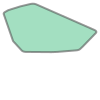

In [275]:
zone['geometry'][0]

In [274]:
zone.to_crs("EPSG:32636").buffer(1000).to_crs("EPSG:4326")[0]

In [311]:
# Загрузка графа дорог
graph=ox.graph.graph_from_polygon(zone.to_crs("EPSG:32636").buffer(1000).to_crs("EPSG:4326")[0], network_type="all")
graph = ox.utils_graph.get_undirected(graph)

# Исходная точка в WGS84 (широта, долгота)
origin_point = ds['geometry'][0]

# Множество других точек в WGS84
# destination_points = [
#     (52.5150, 13.4100),
#     (52.5300, 13.3900),
#     (52.5000, 13.4200)
# ]

# Находим ближайшие узлы в перепроецированном графе
origin_node = ox.distance.nearest_nodes(graph, X=origin_point.coords[0][0], Y=origin_point.coords[0][1])
destination_nodes = [ox.distance.nearest_nodes(graph, X=point.coords[0][0], Y=point.coords[0][1]) for point in dest_points]

# Рассчитываем расстояния
distances = []
for dest_node in destination_nodes:
    length = nx.shortest_path_length(graph, origin_node, dest_node, weight='length')
    distances.append(length)

# Выводим результаты
for i, dist in enumerate(distances):
    print(f"Расстояние от исходной точки до точки {i+1}: {dist:.2f} метров")


C:\Temp\ipykernel_12108\1821626474.py:3: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.utils_graph.get_undirected(graph)


Расстояние от исходной точки до точки 1: 4509.55 метров
Расстояние от исходной точки до точки 2: 835.35 метров
Расстояние от исходной точки до точки 3: 2777.65 метров
Расстояние от исходной точки до точки 4: 1121.46 метров
Расстояние от исходной точки до точки 5: 1044.93 метров
Расстояние от исходной точки до точки 6: 2940.97 метров
Расстояние от исходной точки до точки 7: 1632.66 метров
Расстояние от исходной точки до точки 8: 952.31 метров
Расстояние от исходной точки до точки 9: 3514.62 метров
Расстояние от исходной точки до точки 10: 3048.64 метров
Расстояние от исходной точки до точки 11: 690.57 метров
Расстояние от исходной точки до точки 12: 3319.72 метров
Расстояние от исходной точки до точки 13: 3218.61 метров
Расстояние от исходной точки до точки 14: 3514.62 метров
Расстояние от исходной точки до точки 15: 1135.05 метров
Расстояние от исходной точки до точки 16: 2218.27 метров
Расстояние от исходной точки до точки 17: 4061.79 метров
Расстояние от исходной точки до точки 18: 3

In [280]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(graph,
                                        nodes=True, #вернет геодатафрейм для нод
                                        edges=True, #вернет геодатафрейм для ребер
                                        node_geometry=True,
                                        fill_edge_geometry=True
                                       )

In [312]:
orders

id_order date_completed     Широта    Долгота          darkstore_name  \
0     300328190     2024-06-01  59.985638  30.295476  7565ДС_СПб_Камышовая17   
1     300425930     2024-06-01  60.012228  30.249114  7565ДС_СПб_Камышовая17   
2     300431557     2024-06-01  59.986456  30.256599  7565ДС_СПб_Камышовая17   
3     300517119     2024-06-01  60.005891  30.260334  7565ДС_СПб_Камышовая17   
4     300548374     2024-06-01  60.001523  30.248135  7565ДС_СПб_Камышовая17   
...         ...            ...        ...        ...                     ...   
4995  306207387     2024-06-15  60.001177  30.300921  7565ДС_СПб_Камышовая17   
4996  306207643     2024-06-15  60.021393  30.252599  7565ДС_СПб_Камышовая17   
4997  306207647     2024-06-15  60.013969  30.232999  7565ДС_СПб_Камышовая17   
4998  306208187     2024-06-15  60.026766  30.254792  7565ДС_СПб_Камышовая17   
4999  306208649     2024-06-15  59.996452  30.271770  7565ДС_СПб_Камышовая17   

                                                service  order_sum  \
0     Доставка сейчас                               ...    1068.00   
1     Доставка за 1 час                             ...     569.60   
2     Доставка сейчас                               ...    4172.70   
3     Доставка за 1 час                             ...    1340.36   
4     Доставка за 1 час                             ...     692.80   
...                                                 ...        ...   
4995  Доставка за 1 час                             ...     577.00   
4996  Доставка за 1 час                             ...    1039.70   
4997  Доставка за 1 час                             ...     923.00   
4998  Доставка за 1 час                             ...     604.00   
4999  Доставка за 1 час                             ...     506.00   

      Время_взятия_на_сборку  Время_сборки  Время_взятия_в_доставку  \
0                        NaN           NaN                      NaN   
1                        NaN          19.0                      NaN   
2                        NaN           NaN                      NaN   
3                        NaN           NaN                      NaN   
4                        NaN           NaN                      NaN   
...                      ...           ...                      ...   
4995                     0.0           2.0                      4.0   
4996                     1.0           5.0                      3.0   
4997                     1.0           3.0                      2.0   
4998                     1.0           1.0                      3.0   
4999                     0.0           1.0                      3.0   

      Время_доставки         Вид курьера day workday  \
0               50.0                Авто  01       0   
1                NaN                None  01       0   
2                6.0  Ночной авто курьер  01       0   
3               21.0                Вело  01       0   
4                NaN                Вело  01       0   
...              ...                 ...  ..     ...   
4995            42.0                Авто  15       0   
4996            38.0                Авто  15       0   
4997            49.0                Вело  15       0   
4998            50.0                Авто  15       0   
4999            52.0                Авто  15       0   

                     neighbourhood  total_time                   geometry  
0                    округ Ланское         NaN  POINT (30.29548 59.98564)  
1               округ Озеро Долгое         NaN  POINT (30.24911 60.01223)  
2                    округ Ланское         NaN  POINT (30.25660 59.98646)  
3               округ Озеро Долгое         NaN  POINT (30.26033 60.00589)  
4                       округ № 65         NaN  POINT (30.24814 60.00152)  
...                            ...         ...                        ...  
4995  округ Комендантский аэродром        48.0  POINT (30.30092 60.00118)  
4996                округ Юнтолово        47.0  POINT (30.25260 60.0213

In [313]:
for index, row in orders.iterrows():
    orders.at[index, 'distance']=distances[index]

In [296]:
orders.to_file("orders_1.gpkg")

In [335]:
import statsmodels.api as sm

# Пример данных
X = velo_dist_time['distance']
y = velo_dist_time['Время_доставки']

# Добавляем константу для линейной регрессии
X = sm.add_constant(X)

# Создание и подгонка модели
model = sm.OLS(y, X).fit()

# Результаты модели
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         Время_доставки   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     123.4
Date:                Mon, 19 Aug 2024   Prob (F-statistic):           5.12e-28
Time:                        16:47:23   Log-Likelihood:                -10209.
No. Observations:                2481   AIC:                         2.042e+04
Df Residuals:                    2479   BIC:                         2.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.2634      0.730     35.981      0.0

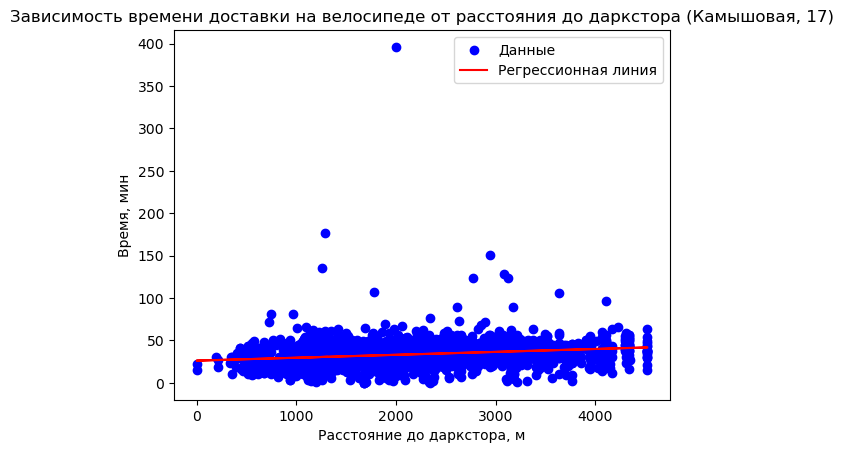

In [338]:
import matplotlib.pyplot as plt

# Исходные данные
plt.scatter(velo_dist_time['distance'], velo_dist_time['Время_доставки'], color='blue', label='Данные')

# Регрессионная линия
plt.plot(velo_dist_time['distance'], model.predict(X), color='red', label='Регрессионная линия')

# Настройка графика
plt.xlabel('Расстояние до даркстора, м')
plt.ylabel('Время, мин')
plt.legend()
plt.title('Зависимость времени доставки на велосипеде от расстояния до даркстора (Камышовая, 17)')
plt.show()


In [163]:
graph=ox.graph.graph_from_polygon(zone['geometry'][0], network_type='all', simplify=False, retain_all=False, truncate_by_edge=True, clean_periphery=None, custom_filter=None)
# g_proj_notsmpl = ox.project_graph(graph, to_crs=utm)
# ox.simplification.consolidate_intersections(g_proj_notsmpl, rebuild_graph=True, tolerance=15, dead_ends=False)

In [70]:
nx.shortest_path(g_proj_notsmpl, orig, dest)


In [76]:
ox.stats

<module 'osmnx.stats' from 'C:\\ProgramData\\anaconda3\\envs\\spatial_analysis_course\\Lib\\site-packages\\osmnx\\stats.py'>

In [128]:
graph.number_of_nodes()

34445

In [129]:
g_undir.number_of_nodes()

34445

In [28]:
g_undir = ox.utils_graph.get_undirected(g_proj_notsmpl)

C:\Temp\ipykernel_12108\1783658470.py:1: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  g_undir = ox.utils_graph.get_undirected(g_proj_notsmpl)


In [29]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(g_undir,
                                        nodes=True, #вернет геодатафрейм для нод
                                        edges=True, #вернет геодатафрейм для ребер
                                        node_geometry=True,
                                        fill_edge_geometry=True
                                       )

In [172]:
ds=ds.to_crs("EPSG:4326")

In [173]:
origin_point=ds['geometry'][0]

In [213]:
origin_point.coords[0]

(30.244757, 60.006952000000005)

In [175]:
orders_reproj=orders.to_crs("EPSG:4326")

In [176]:
dest_points=orders_reproj['geometry']

In [188]:
dest_points_part=dest_points[:500]

In [206]:
origin_node = ox.distance.nearest_nodes(g_proj_notsmpl, X=origin_point.coords[0][1], Y=origin_point.coords[0][0])

In [208]:
destination_nodes_part = [ox.distance.nearest_nodes(graph, X=point.coords[0][1], Y=point.coords[0][0]) for point in dest_points_part]

In [207]:
origin_node

1258669133

In [209]:
import networkx as nx

# Рассчитываем расстояние от исходной точки до каждой точки назначения
distances = []
for dest_node in destination_nodes_part:
    # Рассчитываем кратчайший путь и его длину
    length = nx.shortest_path_length(graph, origin_node, dest_node, weight='length')
    distances.append(length)

# Выводим результаты
for i, dist in enumerate(distances):
    print(f"Расстояние от исходной точки до точки {i+1}: {dist:.2f} метров")


Расстояние от исходной точки до точки 1: 3734.82 метров
Расстояние от исходной точки до точки 2: 3734.82 метров
Расстояние от исходной точки до точки 3: 3734.82 метров
Расстояние от исходной точки до точки 4: 3734.82 метров
Расстояние от исходной точки до точки 5: 3734.82 метров
Расстояние от исходной точки до точки 6: 3734.82 метров
Расстояние от исходной точки до точки 7: 3734.82 метров
Расстояние от исходной точки до точки 8: 3734.82 метров
Расстояние от исходной точки до точки 9: 3734.82 метров
Расстояние от исходной точки до точки 10: 3734.82 метров
Расстояние от исходной точки до точки 11: 3734.82 метров
Расстояние от исходной точки до точки 12: 3734.82 метров
Расстояние от исходной точки до точки 13: 3734.82 метров
Расстояние от исходной точки до точки 14: 3734.82 метров
Расстояние от исходной точки до точки 15: 3734.82 метров
Расстояние от исходной точки до точки 16: 3734.82 метров
Расстояние от исходной точки до точки 17: 3734.82 метров
Расстояние от исходной точки до точки 18

In [201]:
orders_reproj.iloc[:136]

id_order date_completed     Широта    Долгота          darkstore_name  \
0    300328190     2024-06-01  59.985638  30.295476  7565ДС_СПб_Камышовая17   
1    300425930     2024-06-01  60.012228  30.249114  7565ДС_СПб_Камышовая17   
2    300431557     2024-06-01  59.986456  30.256599  7565ДС_СПб_Камышовая17   
3    300517119     2024-06-01  60.005891  30.260334  7565ДС_СПб_Камышовая17   
4    300548374     2024-06-01  60.001523  30.248135  7565ДС_СПб_Камышовая17   
..         ...            ...        ...        ...                     ...   
131  304270563     2024-06-10  60.028753  30.246374  7565ДС_СПб_Камышовая17   
132  304270738     2024-06-10  60.009495  30.281355  7565ДС_СПб_Камышовая17   
133  304271071     2024-06-10  60.005171  30.261466  7565ДС_СПб_Камышовая17   
134  304272059     2024-06-10  60.021767  30.258734  7565ДС_СПб_Камышовая17   
135  304272148     2024-06-10  60.003669  30.250748  7565ДС_СПб_Камышовая17   

                                               service  order_sum  \
0    Доставка сейчас                               ...    1068.00   
1    Доставка за 1 час                             ...     569.60   
2    Доставка сейчас                               ...    4172.70   
3    Доставка за 1 час                             ...    1340.36   
4    Доставка за 1 час                             ...     692.80   
..                                                 ...        ...   
131  Доставка за 1 час                             ...     469.00   
132  Доставка за 1 час                             ...     600.00   
133  Доставка за 1 час                             ...    1746.17   
134  Доставка за 1 час                             ...    3482.06   
135  Доставка за 1 час                             ...     682.00   

     Время_взятия_на_сборку  Время_сборки  Время_взятия_в_доставку  \
0                       NaN           NaN                      NaN   
1                       NaN          19.0                      NaN   
2                       NaN           NaN                      NaN   
3                       NaN           NaN                      NaN   
4                       NaN           NaN                      NaN   
..                      ...           ...                      ...   
131                     1.0           1.0                      2.0   
132                     1.0           2.0                      4.0   
133                     0.0           5.0                      3.0   
134                     1.0           6.0                      2.0   
135                     0.0           2.0                      3.0   

     Время_доставки         Вид курьера day workday  \
0              50.0                Авто  01       0   
1               NaN                None  01       0   
2               6.0  Ночной авто курьер  01       0   
3              21.0                Вело  01       0   
4               NaN                Вело  01       0   
..              ...                 ...  ..     ...   
131            51.0                Авто  10       1   
132            33.0                Авто  10       1   
133            44.0                Авто  10       1   
134            50.0                Авто  10       1   
135            41.0                Вело  10       1   

                    neighbourhood  total_time                   geometry  \
0                   округ Ланское         NaN  POINT (30.29548 59.98564)   
1              округ Озеро Долгое         NaN  POINT (30.24911 60.01223)   
2                   округ Ланское         NaN  POINT (30.25660 59.98646)   
3              округ Озеро Долгое         NaN  POINT (30.26033 60.00589)   
4                      округ № 65         NaN  POINT (30.24814 60.00152)   
..                            ...         ...                        ...   
131                округ Юнтолово        55.0  POINT (30.24637 60.02875)   
132  округ Комендантский аэродром        40.0  POINT (30.28136 60.00950)   
133            округ Озеро Долгое        5

In [203]:
for index, row in orders_reproj.iloc[:136].iterrows():
    orders_reproj.at[index, 'distance']=distances[index]

In [205]:
orders_reproj.iloc[:136].to_file("7565ДС_СПб_Камышовая17/orders_dist_1.gpkg")

In [341]:
orders_reproj=orders_reproj.drop("ds_distance", axis=1)

In [342]:
orders_reproj.to_file("7565ДС_СПб_Камышовая17/orders_reproj_with_distances.gpkg")

In [343]:
orders_all=gpd.read_file("7565ДС_СПб_Камышовая17/orders_7565ДС_СПб_Камышовая17.gpkg")

In [348]:
orders_all.to_crs("EPSG:4326")

id_order date_completed     Широта    Долгота          darkstore_name  \
0      300328190     2024-06-01  59.985638  30.295476  7565ДС_СПб_Камышовая17   
1      300425930     2024-06-01  60.012228  30.249114  7565ДС_СПб_Камышовая17   
2      300431557     2024-06-01  59.986456  30.256599  7565ДС_СПб_Камышовая17   
3      300517119     2024-06-01  60.005891  30.260334  7565ДС_СПб_Камышовая17   
4      300548374     2024-06-01  60.001523  30.248135  7565ДС_СПб_Камышовая17   
...          ...            ...        ...        ...                     ...   
29750  304241077     2024-06-10  60.014552  30.259479  7565ДС_СПб_Камышовая17   
29751  304241594     2024-06-10  59.987353  30.291410  7565ДС_СПб_Камышовая17   
29752  304241648     2024-06-10  59.994391  30.256750  7565ДС_СПб_Камышовая17   
29753  304241901     2024-06-10  60.029879  30.249320  7565ДС_СПб_Камышовая17   
29754  304242107     2024-06-10  60.012263  30.257839  7565ДС_СПб_Камышовая17   

                                                 service  order_sum  \
0      Доставка сейчас                               ...    1068.00   
1      Доставка за 1 час                             ...     569.60   
2      Доставка сейчас                               ...    4172.70   
3      Доставка за 1 час                             ...    1340.36   
4      Доставка за 1 час                             ...     692.80   
...                                                  ...        ...   
29750  Доставка за 1 час                             ...    3507.80   
29751  Доставка сейчас                               ...     579.09   
29752  Доставка за 1 час                             ...    1609.62   
29753  Доставка за 1 час                             ...    1901.79   
29754  Доставка за 1 час                             ...    1141.40   

       Время_взятия_на_сборку  Время_сборки  Время_взятия_в_доставку  \
0                         NaN           NaN                      NaN   
1                         NaN          19.0                      NaN   
2                         NaN           NaN                      NaN   
3                         NaN           NaN                      NaN   
4                         NaN           NaN                      NaN   
...                       ...           ...                      ...   
29750                     3.0           7.0                      3.0   
29751                     9.0           2.0                      2.0   
29752                     1.0           4.0                      4.0   
29753                     3.0           9.0                      1.0   
29754                     4.0           4.0                      3.0   

       Время_доставки         Вид курьера day workday       neighbourhood  \
0                50.0                Авто  01       0       округ Ланское   
1                 NaN                None  01       0  округ Озеро Долгое   
2                 6.0  Ночной авто курьер  01       0       округ Ланское   
3                21.0                Вело  01       0  округ Озеро Долгое   
4                 NaN                Вело  01       0          округ № 65   
...               ...                 ...  ..     ...                 ...   
29750            23.0                Авто  10       1  округ Озеро Долгое   
29751            42.0                Авто  10       1       округ Ланское   
29752            46.0                Авто  10       1  округ Озеро Долгое   
29753            44.0                Вело  10       1      округ Юнтолово   
29754            32.0                Авто  10       1  округ Озеро Долгое   

       total_time                   geometry  
0             NaN  POINT (30.29548 59.98564)  
1             NaN  POINT (30.24911 60.01223)  
2             NaN  POINT (30.25660 59.98646)  
3             NaN  POINT (30.26033 60.00589)  
4             NaN  POINT (30.24814 60.00152)  
...           ...                        ...  
29750        36.0  POINT (30.25948 60.01455)  
29751        55.

In [354]:
orders_all=orders_all.to_crs("EPSG:4326")

In [355]:
express=orders_all[orders_all['service']=='Экспресс\xa0доставка                                                                                                                                                                                                                                              ']

In [359]:
express['geometry']

128      POINT (30.25016 60.00591)
166      POINT (30.24430 60.00330)
227      POINT (30.25582 60.00431)
269      POINT (30.23950 60.00460)
308      POINT (30.24859 60.00264)
                   ...            
29538    POINT (30.23750 60.00311)
29564    POINT (30.25176 60.00706)
29566    POINT (30.25014 60.00046)
29607    POINT (30.25398 60.00953)
29667    POINT (30.25261 59.99913)
Name: geometry, Length: 476, dtype: geometry

In [360]:
# Находим ближайшие узлы в перепроецированном графе
origin_node = ox.distance.nearest_nodes(graph, X=origin_point.coords[0][0], Y=origin_point.coords[0][1])
destination_nodes = [ox.distance.nearest_nodes(graph, X=point.coords[0][0], Y=point.coords[0][1]) for point in express['geometry']]

# Рассчитываем расстояния
distances = []
for dest_node in destination_nodes:
    length = nx.shortest_path_length(graph, origin_node, dest_node, weight='length')
    distances.append(length)

# Выводим результаты
for i, dist in enumerate(distances):
    print(f"Расстояние от исходной точки до точки {i+1}: {dist:.2f} метров")


Расстояние от исходной точки до точки 1: 428.83 метров
Расстояние от исходной точки до точки 2: 577.36 метров
Расстояние от исходной точки до точки 3: 873.66 метров
Расстояние от исходной точки до точки 4: 479.17 метров
Расстояние от исходной точки до точки 5: 824.06 метров
Расстояние от исходной точки до точки 6: 824.06 метров
Расстояние от исходной точки до точки 7: 861.86 метров
Расстояние от исходной точки до точки 8: 1200.86 метров
Расстояние от исходной точки до точки 9: 811.23 метров
Расстояние от исходной точки до точки 10: 719.50 метров
Расстояние от исходной точки до точки 11: 1013.97 метров
Расстояние от исходной точки до точки 12: 1358.15 метров
Расстояние от исходной точки до точки 13: 665.29 метров
Расстояние от исходной точки до точки 14: 1211.12 метров
Расстояние от исходной точки до точки 15: 1135.05 метров
Расстояние от исходной точки до точки 16: 279.26 метров
Расстояние от исходной точки до точки 17: 824.06 метров
Расстояние от исходной точки до точки 18: 815.40 мет

In [367]:
express=express.reset_index()
for index, row in express.iterrows():
    express.at[index, 'distance']=distances[index]

In [372]:
express[express['distance']==max(express['distance'])].explore()

In [373]:
orders_all=gpd.read_file("order_points_FULL.gpkg")

In [376]:
express_all=orders_all[orders_all['service']=='Экспресс\xa0доставка                                                                                                                                                                                                                                              ']

In [383]:
express_all['dsid']=express_all['darkstore_name'].str[:4]

C:\ProgramData\anaconda3\envs\spatial_analysis_course\Lib\site-packages\geopandas\geodataframe.py:1525: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [384]:
express_all.dsid.unique()

array(['5450', '4783', '4789', '4756', '4765', '5018', '4986', '6954',
       '6799', '6708', '7565', '6831', '5420', '8109', '5449'],
      dtype=object)

In [379]:
ds=gpd.read_file("darkstores.gpkg")

In [380]:
ds

darkstore_name   latitude  longitude  \
0               4756ДС_СПб_Лиговский60  59.921583  30.363641   
1         4765ДС_СПб_Союзныйпроспект12  59.920496  30.439080   
2   4783ДС_СПб_5-йПредпортовыйпроезд26  59.822743  30.314161   
3                 4789ДС_СПб_Оптиков30  59.999102  30.220117   
4                    4986ДС_СПб_5яВО70  59.949316  30.274352   
5           5018ДС_СПб_Полюстровский59  59.972333  30.382152   
6      5420ДС_ПушСПб_Новодеревенская19  59.721883  30.440231   
7                  5449ДС_СПб_Верхняя4  60.060753  30.350915   
8         5450ДС_СПб_МаршалаКазакова35  59.862506  30.211044   
9                6708ДС_СПб_Афонская25  60.026141  30.303426   
10            6799ДС_СПб_Промышленная6  59.899306  30.272947   
11             6831ДС_Куд_Строителей19  59.902515  30.523253   
12      6954ДС_СПб_МалаяБухарестская12  59.846409  30.420073   
13              7565ДС_СПб_Камышовая17  60.006952  30.244757   
14     8109ДС_СПб_Инструментальщиков12  60.083719  29.948098   

                          geometry  
0   POINT (352628.019 6645612.856)  
1   POINT (356838.944 6645326.296)  
2   POINT (349416.728 6634722.691)  
3   POINT (344970.777 6654569.116)  
4   POINT (347765.795 6648901.769)  
5   POINT (353885.974 6651220.717)  
6   POINT (356048.881 6623216.252)  
7   POINT (352537.519 6661132.008)  
8   POINT (343824.038 6639387.169)  
9   POINT (349737.807 6657386.362)  
10  POINT (347457.927 6643338.759)  
11  POINT (361468.006 6643145.688)  
12  POINT (355455.347 6637120.958)  
13  POINT (346380.791 6655385.343)  
14  POINT (330242.603 6664654.944)

In [393]:
from shapely.geometry import MultiPoint, Point


In [430]:
ds['dsid']=ds['darkstore_name'].str[:4]

In [532]:
orders_all['service']=orders_all['service'].str.replace('  ', '')

In [537]:
orders_all['dsid']=orders_all['darkstore_name'].str[:4]

In [449]:
express_all[express_all['dsid']=='5450'].to_crs("EPSG:4326")['geometry']

930       POINT (30.15963 59.86449)
1129      POINT (30.15480 59.86785)
1157      POINT (30.21070 59.85703)
1225      POINT (30.18431 59.84946)
1949      POINT (30.17202 59.86688)
                    ...            
776690    POINT (30.18320 59.84930)
776696    POINT (30.17840 59.85830)
776960    POINT (30.18770 59.86140)
776968    POINT (30.21990 59.85429)
777352    POINT (30.19569 59.85708)
Name: geometry, Length: 3086, dtype: geometry

In [538]:
for n in ds['dsid'].unique():
    graph=ox.graph.graph_from_polygon(gpd.GeoDataFrame(index=[0], crs='epsg:32636', geometry=[MultiPoint(orders_all[orders_all['dsid']==n]['geometry'].to_list()).convex_hull.buffer(200)]).to_crs('EPSG:4326')['geometry'][0], network_type="all")
    graph = ox.utils_graph.get_undirected(graph)

    # Исходная точка в WGS84 (широта, долгота)
    origin_point = ds[ds['dsid']==n].to_crs('EPSG:4326')['geometry'][ds[ds['dsid']==n].index[0]]

    # Находим ближайшие узлы в перепроецированном графе
    origin_node = ox.distance.nearest_nodes(graph, X=origin_point.coords[0][0], Y=origin_point.coords[0][1])
    destination_nodes = [ox.distance.nearest_nodes(graph, X=point.coords[0][0], Y=point.coords[0][1]) for point in orders_all[orders_all['dsid']==n].to_crs("EPSG:4326")['geometry']]

    # Рассчитываем расстояния
    distances = []
    for dest_node in destination_nodes:
        length = nx.shortest_path_length(graph, origin_node, dest_node, weight='length')
        distances.append(length)

    k=orders_all[orders_all['dsid']==n].reset_index()
    for index, row in k.iterrows():
        k.at[index, 'distance']=distances[index]
    k.to_file(f"all_orders_{n}.gpkg")

C:\Temp\ipykernel_12108\3579866408.py:3: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.utils_graph.get_undirected(graph)
C:\Temp\ipykernel_12108\3579866408.py:3: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.utils_graph.get_undirected(graph)
C:\Temp\ipykernel_12108\3579866408.py:3: FutureWarning: The `get_undirected` function is deprecated and will be removed in the v2.0.0 release. Replace it with `convert.to_undirected` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  graph = ox.utils_graph.get_undirected(graph)


KeyboardInterrupt: 

In [540]:
len(distances)

64161

In [534]:
ds['dsid'].unique()
    

array(['4756', '4765', '4783', '4789', '4986', '5018', '5420', '5449',
       '5450', '6708', '6799', '6831', '6954', '7565', '8109'],
      dtype=object)

In [493]:
express_5450.to_file("express_5450.gpkg")

In [489]:
express_4756['Вид курьера'].unique()

array(['Ночной авто курьер', 'Вело', None, 'Авто', 'Ночной Вело Курьер'],
      dtype=object)